In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

from scipy.ndimage import map_coordinates

In [47]:
n = 50
m = 50
x_grid = np.linspace(1, 11, n)
y_grid = np.empty(m)

x_mat, y_mat = np.meshgrid(x_grid, y_grid, indexing="ij")
u_mat = np.empty_like(x_mat)

u_mat.shape

(50, 50)

In [48]:
for i in range(u_mat.shape[1]):
    u_mat[:, i] = (i + 1) * 2
    y_mat[:, i] = u_mat[:, i] / x_mat[:, i]

In [49]:
x_new = np.linspace(1, 10, 100)
y_new = np.linspace(1, 10, 100)

x_new, y_new = np.meshgrid(x_new, y_new, indexing="ij")

In [50]:
degree = 10

X_train = np.c_[x_mat.ravel(), y_mat.ravel()]

coords = np.mgrid[[slice(0, dim) for dim in x_mat.shape]]

y_train = coords[0].ravel()

In [51]:
X_train.shape

(2500, 2)

In [52]:
model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
model.fit(X_train, y_train)
x_idx = model.predict(np.c_[x_new.ravel(), y_new.ravel()])


c:\Users\alujan\miniconda3\envs\hark-gpu\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.37147e-44): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [53]:
y_train = coords[1].ravel()
model.fit(X_train, y_train)
y_idx = model.predict(np.c_[x_new.ravel(), y_new.ravel()])

c:\Users\alujan\miniconda3\envs\hark-gpu\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.37147e-44): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [54]:
u_interp = map_coordinates(u_mat, [x_idx, y_idx], order=1)

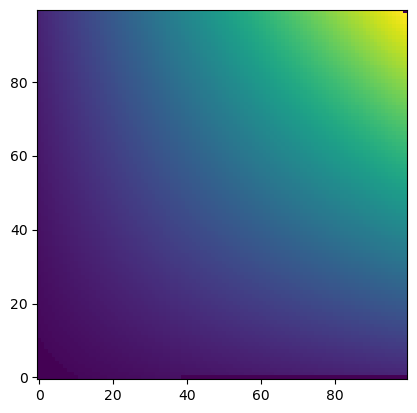

In [55]:
plt.imshow(u_interp.reshape(x_new.shape), origin="lower")

In [56]:
from HARK.irregularinterp import RegularizedPolynomialInterp

In [57]:
poly_interp = RegularizedPolynomialInterp(u_mat, [x_mat, y_mat], degree=3)

In [58]:
u_poly = poly_interp(x_new, y_new)

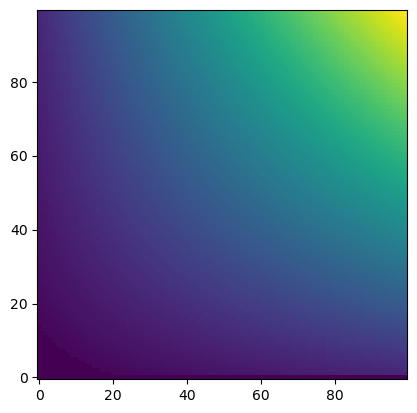

In [59]:
plt.imshow(u_poly, origin="lower")

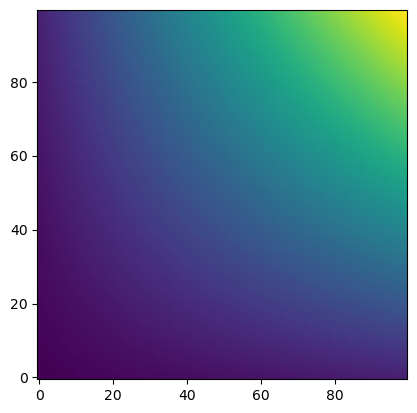

In [60]:
plt.imshow(x_new * y_new, origin="lower")